# Conv & Orientation Filters

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image, math

In [12]:
def grad_filter(deg, samples, min=-1, max=1):
    gradient = np.linspace(min, max, samples)
    X, Y = np.meshgrid(gradient, gradient)

    rad = np.deg2rad(deg)
    
    kernel = np.cos(rad) * X + np.sin(rad) * Y
    return kernel

In [13]:
def gabor_filter(sigma_x, sigma_y, deg, samples, k=2, min=-5, max=5):
    gradient = np.linspace(min, max, samples)
    X, Y = np.meshgrid(gradient, gradient)

    rad = np.deg2rad(deg)
    X = X * np.cos(rad) - Y * np.sin(rad)
    Y = X * np.sin(rad) + Y * np.cos(rad)

    C = 1 / (2 * math.pi * sigma_x * sigma_y)
    z = C * np.exp(-(X**2) / (2 * sigma_x**2) - (Y**2) / (2 * sigma_y**2))
    kernel = np.cos(X * k) * z
    return kernel

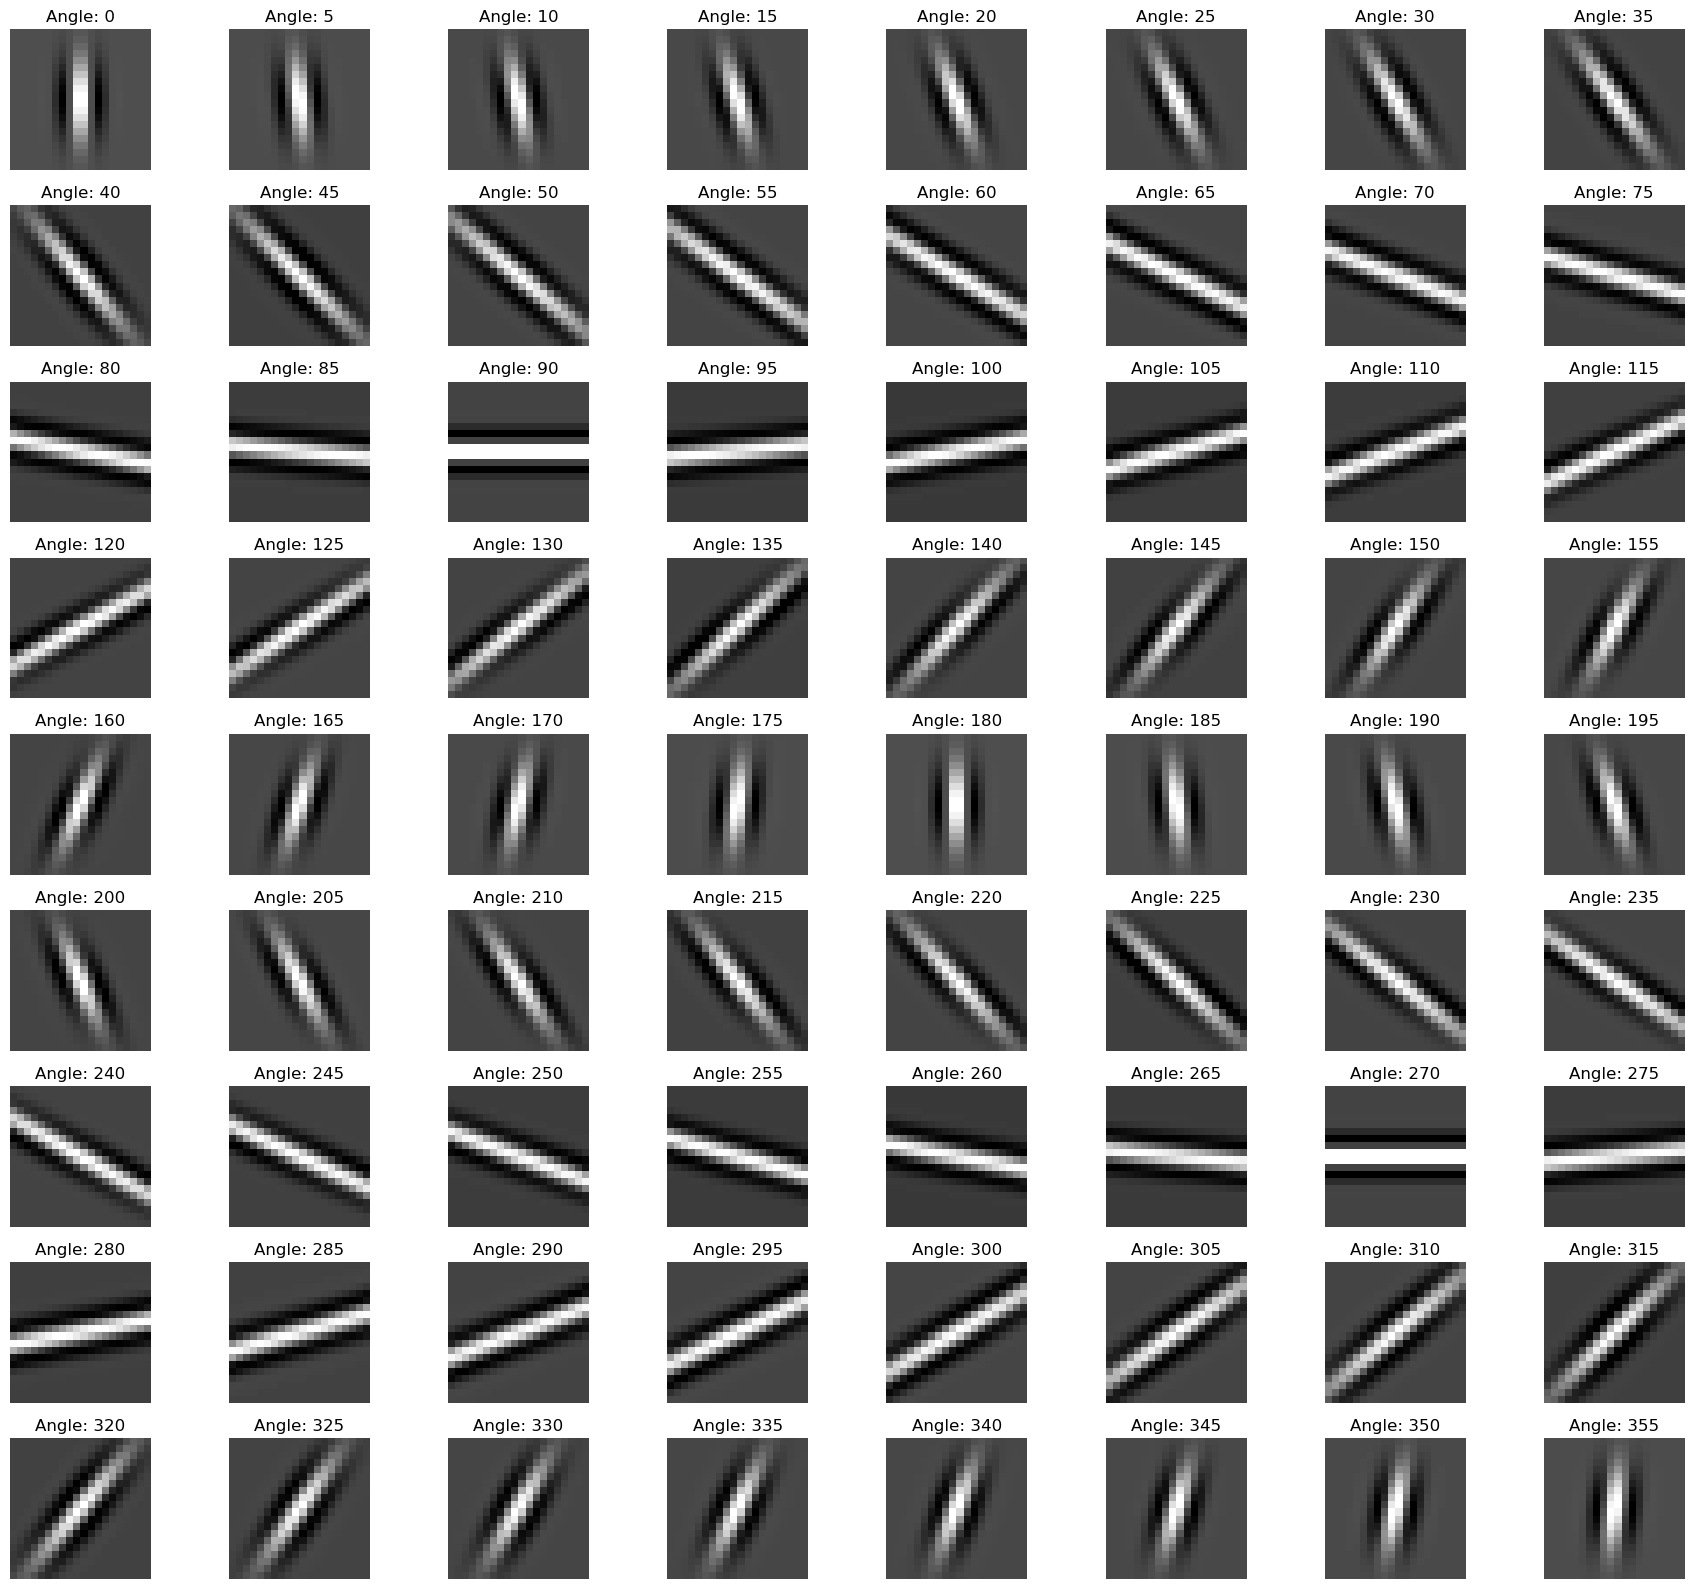

In [14]:
n = 72
row = 9
col = int(n/row)
step = int(360/n)

sigma_x = 1
sigma_y = 2

plt.figure(figsize=(18,16))
for i in range(n):
    # kernel = grad_filter(i*step, 5)
    kernel = gabor_filter(sigma_x, sigma_y, i*step, 20)
    plt.subplot(row,col,i+1)
    plt.imshow(kernel, cmap='gray')
    plt.title('Angle: ' + str(i*step))
    plt.axis('off')

plt.tight_layout()

In [15]:
FILENAME = "../data/images/kingfisher_resized.png"

In [16]:
img = PIL.Image.open(FILENAME)
img = np.array(img, dtype=float) / np.max(img)
L = np.sum(img, axis=2)/3 # Collapse channels = B&W

(35, 35)


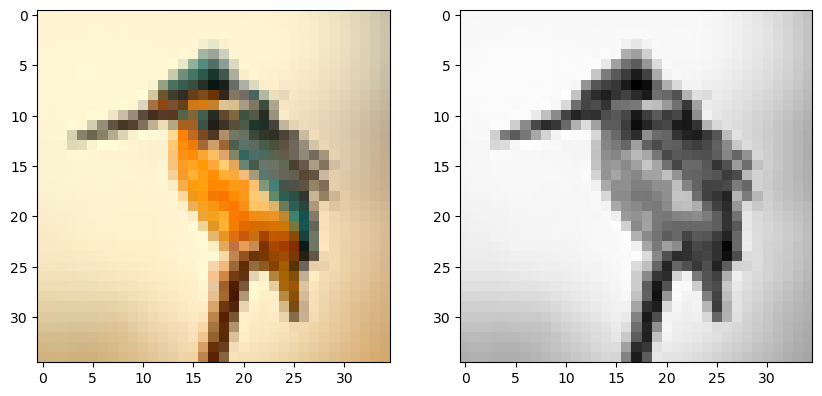

In [17]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(L, 'gray')
print(L.shape)

In [18]:
kernel = grad_filter(45, 3)
# kernel = gabor_filter(sigma_x, sigma_y, 45, 20)

h, w = L.shape
step = kernel.shape[0]
pad_im = np.pad(L, pad_width=step//2, mode='edge')

map = np.array([[np.sum(pad_im[j:j+step, i:i+step] * kernel) for i in range(w)] for j in range(h)])

Text(0.5, 1.0, 'Activation Map')

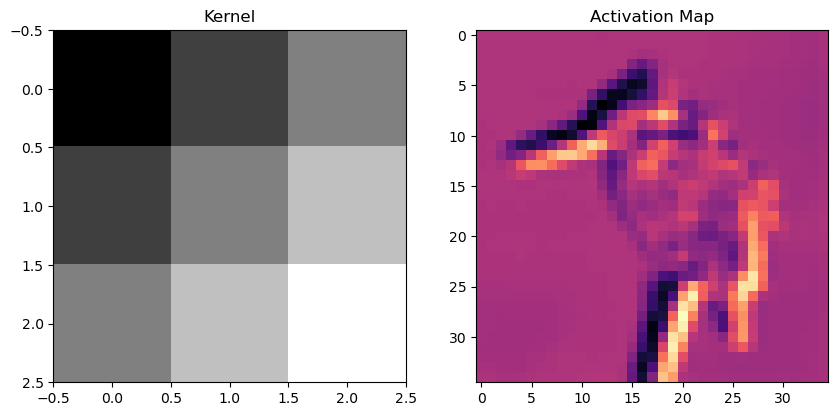

In [19]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(kernel, 'gray')
plt.title('Kernel')
plt.subplot(1,2,2)
plt.imshow(map, 'magma')
plt.title('Activation Map')